In [251]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from scipy.integrate import simps
#%matplotlib inline

path = '/Users/chrislam/Desktop/sculpting/'
old_k = pd.Series([864, 138, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity
nonzero_k = pd.Series([68236, 864, 138, 38, 15, 5, 0]) # "ground truth" Kepler transit multiplicity

k = pd.Series([579, 99, 29, 6, 3, 0]) # ground truth using koi_score>0.9 instead of koi_disposition!='FALSE POSITIVE'
k = pd.Series([646, 119, 32, 10, 4, 0]) # ground truth using koi_score>0.5 instead of koi_disposition!='FALSE POSITIVE'
k = pd.Series([1113, 117, 35, 9, 3, 0]) # ground truth using fpp_prob<=0.5

print("observed ratio of koi_disposition:koi_score: ", old_k/k)

observed ratio of koi_disposition:koi_score:  0    0.776280
1    1.179487
2    1.085714
3    1.666667
4    1.666667
5         NaN
dtype: float64


In [252]:
#https://stackoverflow.com/questions/52232742/how-to-use-ast-literal-eval-in-a-pandas-dataframe-and-handle-exceptions
def literal_eval_w_exceptions(x):
    try:
        return literal_eval(str(x))   
    except Exception as e:
        #print(e)
        pass
    
def float_w_exceptions(x):
    try:
        return float(x)   
    except Exception as e:
        #print(e)
        pass

In [253]:
# change path here to get logLs_incremental_corrected.txt
df = pd.read_csv(path+'hipergator/logLs_fixed_detection5.txt', sep='\t', error_bad_lines=False, skiprows=1, index_col=False,
                 names=['filename','m','b','c','f','logL','transit_multiplicity','geom_transit_multiplicity','intact_frac',
                            'disrupted_frac','intact_frac2','disrupted_frac2','intact_logL','intact_transit_multiplicity','disrupted_logL',
                        'disrupted_transit_multiplicity','young10_logL','young10_transit_multiplicity',
                        'old10_logL','old10_transit_multiplicity','young15_logL','young15_transit_multiplicity',
                        'old15_logL','old15_transit_multiplicity','young20_logL','young20_transit_multiplicity',
                        'old20_logL','old20_transit_multiplicity','young25_logL','young25_transit_multiplicity',
                        'old25_logL','old25_transit_multiplicity','young30_logL','young30_transit_multiplicity',
                        'old30_logL','old30_transit_multiplicity','young35_logL','young35_transit_multiplicity',
                        'old35_logL','old35_transit_multiplicity','young40_logL','young40_transit_multiplicity',
                        'old40_logL','old40_transit_multiplicity','young45_logL','young45_transit_multiplicity',
                        'old45_logL','old45_transit_multiplicity','young50_logL','young50_transit_multiplicity',
                        'old50_logL','old50_transit_multiplicity'], dtype=str)
print(df.head())
#print(df.columns)
print(df.transit_multiplicity[0])
#print(df.logL)

df.transit_multiplicity = df.transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.geom_transit_multiplicity = df.geom_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
#df.transit_multiplicity = df.transit_multiplicity.apply(lambda y: np.nan if len(y)==0 else y)
#df.logL = df.logL.apply(str) # convert back from string to list of floats
df.logL = df.logL.apply(float_w_exceptions) # convert back from string to list of floats
df.m = df.m.apply(float_w_exceptions) # convert back from string to list of floats
df.b = df.b.apply(float_w_exceptions) # convert back from string to list of floats
df.c = df.c.apply(float_w_exceptions) # convert back from string to list of floats
df.f = df.f.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac = df.intact_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac = df.disrupted_frac.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_frac2 = df.intact_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_frac2 = df.disrupted_frac2.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_logL = df.intact_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.intact_transit_multiplicity = df.intact_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.disrupted_logL = df.disrupted_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.disrupted_transit_multiplicity = df.disrupted_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young10_logL = df.young10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young10_transit_multiplicity = df.young10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old10_logL = df.old10_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old10_transit_multiplicity = df.old10_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young15_logL = df.young15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young15_transit_multiplicity = df.young15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old15_logL = df.old15_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old15_transit_multiplicity = df.old15_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young20_logL = df.young20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young20_transit_multiplicity = df.young20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old20_logL = df.old20_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old20_transit_multiplicity = df.old20_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young25_logL = df.young25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young25_transit_multiplicity = df.young25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old25_logL = df.old25_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old25_transit_multiplicity = df.old25_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young30_logL = df.young30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young30_transit_multiplicity = df.young30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old30_logL = df.old30_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old30_transit_multiplicity = df.old30_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young35_logL = df.young35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young35_transit_multiplicity = df.young35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old35_logL = df.old35_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old35_transit_multiplicity = df.old35_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young40_logL = df.young40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young40_transit_multiplicity = df.young40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old40_logL = df.old40_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old40_transit_multiplicity = df.old40_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young45_logL = df.young45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young45_transit_multiplicity = df.young45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old45_logL = df.old45_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old45_transit_multiplicity = df.old45_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.young50_logL = df.young50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.young50_transit_multiplicity = df.young50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats
df.old50_logL = df.old50_logL.apply(float_w_exceptions) # convert back from string to list of floats
df.old50_transit_multiplicity = df.old50_transit_multiplicity.apply(literal_eval_w_exceptions) # convert back from string to list of floats


                                            filename     m    b            c  \
0  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
1  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
2  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
3  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   
4  /blue/sarahballard/c.lam/sculpting2/simulation...  -2.0  0.0  100000000.0   

     f                logL                             transit_multiplicity  \
0  0.0  -5663.297833147215                   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
1  0.0  -5663.297833147215                   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
2  0.0  -5663.297833147215                   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   
3  0.1  -791.3944345201753                [244.5, 15.8, 0.0, 0.0, 0.0, 0.0]   
4  0.1   -797.280763843821  [242.8, 15.600000000000001, 0.0, 0.0, 0.0, 0.0]   

             geom_transit_multiplicity intac

In [254]:
import copy 

def add_zero_bin(curr_row: pd.Series):
    temp = copy.copy(curr_row.transit_multiplicity)
    temp.insert(0, nonzero_k[0]-np.sum(temp))
    
    return temp

df['transit_multiplicity_zero_bin'] = df.apply(func=add_zero_bin, axis=1)
print(df['transit_multiplicity_zero_bin'])

0                  [68236.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
1                  [68236.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
2                  [68236.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
3               [67975.7, 244.5, 15.8, 0.0, 0.0, 0.0, 0.0]
4        [67977.6, 242.8, 15.600000000000001, 0.0, 0.0,...
                               ...                        
43841    [63601.9, 2291.4, 1324.8, 636.3000000000001, 3...
43842    [63619.9, 2259.0, 1322.1000000000001, 656.1, 2...
43843    [63062.0, 2663.0, 1420.0, 697.0, 309.0, 72.0, ...
43844    [63087.0, 2546.0, 1472.0, 707.0, 334.0, 80.0, ...
43845    [63107.0, 2510.0, 1469.0, 729.0, 315.0, 101.0,...
Name: transit_multiplicity_zero_bin, Length: 43846, dtype: object


In [255]:
def normalize(curr_row: pd.Series, column):
    """
    First, remove fraction of planet-hosting systems from each multiplicity. 
    Then, normalize against sample total planet-hosting systems. 
    """
    #print(curr_row)
    first = curr_row[column]
    first += [0.] * (6 - len(first)) # pad with zeros to match length of k
    second = curr_row['f'] ### removed as of 13 June 2022 because the following step takes care of this
    #print(first)
    #print(second)
    
    try:
        # remove previous normalization
        first = [np.array(fl)/second for fl in first] ### removed as of 13 June 2022 because the following step takes care of this
        
        # normalize against Kepler data s.t. sum of every transit multiplicity is 1025
        if column=='transit_multiplicity_zero_bin': # zero bin case
            return [np.array(fl)*sum(k)/sum(first[1:]) for fl in first]
        
        elif column=='transit_multiplicity': # excluding zero bin            
            return [np.array(fl)*sum(k)/sum(first) for fl in first]
    
    except Exception as e: # return list of N nans, where N is length of transit multiplicity array    
        print(e)
        try: # eg. divide by zero for f=0; we don't care about those
            return np.nan*np.ones(len(first))
        
        except: # eg. accessed one too many levels
            return np.nan

def normalized_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of floats)
    - k: Kepler transit multiplicity; normally a global variable, but this is so it's flexible to including the zero-bin (list of floats)

    Returns: Poisson log likelihood (float)
    """
    logL = []
    try:
        for i in range(len(lam)):
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
    except:
        #print(lam)
        return np.nan
    
    return np.sum(logL)    

#normalized_k = k/sum(k)
df['normalized_transit_multiplicity'] = df.apply(func=normalize, args=['transit_multiplicity'], axis=1)
df['normalized_transit_multiplicity_zero_bin'] = df.apply(func=normalize, args=['transit_multiplicity_zero_bin'], axis=1)
#df['normalized_logL'] = better_loglike(df['normalized_transit_multiplicity'], normalized_k)
df['normalized_logL'] = df['normalized_transit_multiplicity'].apply(func=normalized_loglike, args=[k])
df['normalized_logL_zero_bin'] = df['normalized_transit_multiplicity_zero_bin'].apply(func=normalized_loglike, args=[nonzero_k])

df['likelihood'] = np.exp(df['logL'])
df['normalized_likelihood'] = np.exp(df['normalized_logL'])
df['normalized_likelihood_zero_bin'] = np.exp(df['normalized_logL_zero_bin'])


In [256]:
def better_loglike(lam, k):
    """
    Calculate Poisson log likelihood
    Changed 0 handling from simulate.py to reflect https://www.aanda.org/articles/aa/pdf/2009/16/aa8472-07.pdf

    Params: 
    - lam: model predictions for transit multiplicity (list of ints)
    - k: Kepler transit multiplicity (list of ints); can accept alternate ground truths as well

    Returns: Poisson log likelihood (float)
    """
    
    logL = []
    #print(lam)
    for i in range(len(lam)):
        try:
            if lam[i]==0:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = 0
                logL.append(term1+term2+term3)

            else:
                term3 = -lgamma(k[i]+1)
                term2 = -lam[i]
                term1 = k[i]*np.log(lam[i])
                logL.append(term1+term2+term3)
        except Exception as e:
            #print("error here: ", lam)
            #print("error: ", e)
            return lam

    return np.sum(logL)

def pad(lam):
    lam += [0.] * (6 - len(lam)) # pad with zeros to match length of k
    return lam

def fix_c_for_flat_models(m, c): # basically removes grids in 4d param space, which causes problems later when marginalizing
    if m==0:
        return 1e8
    else:
        return c

def redundancy_check(m, b, cutoff):
    # skip simulations if cutoff occurs more than once after probability has reached zero (use the first one for all)
    # also don't vary cutoffs if m is flat   

    y = b + m*(np.log10(cutoff)-8)
    if y < 0:
        return False
    #elif m==0:
    #    return False
    else:
        return True
    
# c's that span cutoff time parameter space don't make sense for m=0. Set those all to minimum cutoff time.
df['fixed_c'] = df.apply(lambda x: fix_c_for_flat_models(x.m, x.c), axis=1) 
df['redundant'] = df.apply(lambda x: redundancy_check(x.m, x.b, x.fixed_c), axis=1)

### in order to marginalize over posteriors, I need to add. In order to add, I need to unlog
df['normalized_likelihood'] = np.exp(df['normalized_logL'])

# re-evaluate logL based on new k
#df['padded_transit_multiplicities'] = df.transit_multiplicity.apply(pad)

#df['corrected_logL'] = df.padded_transit_multiplicities.apply(lambda x: better_loglike(x, pad(list(k))))



In [257]:
df[['normalized_likelihood', 'normalized_logL']]

,normalized_likelihood,normalized_logL
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,1.355556e-55,-126.337968
4,1.060877e-55,-126.583084
...,...,...
43841,2.553932e-187,-429.645778
43842,1.315014e-191,-439.519906
43843,8.981191e-171,-391.546918
43844,2.553932e-187,-429.645778


In [258]:
len(df.filename.unique())

3986

#### Models that best fit the observed multiplicity, based off an arbitrary (normalized, 1+ bin) logL threshold

In [259]:
### make logL-based cut
threshold = -50 # -50
#df_keep = df.loc[(df.normalized_logL >= threshold)] 
df_keep = df.loc[(df.normalized_logL >= threshold)] 
###df_keep = df.loc[(df.normalized_logL_zero_bin >= -100)] 
print(len(df_keep), len(df))
print(len(df_keep.groupby(['m','b','c','f']).size()), len(df.groupby(['m','b','c','f']).size()))

4290 43846
1520 14641


total:  14641
remaining based on transit multiplicity:  1520


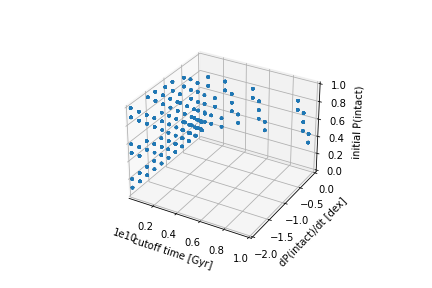

In [260]:
%matplotlib widget

#df_keep['intact_frac_over_planets'] = df_keep.intact_frac/(df_keep.intact_frac+df_keep.disrupted_frac)
#df_keep = df_keep.loc[df_keep.corrected_logL >= threshold] # rule out models based on transit multiplicity
print("total: ", len(df.groupby(['m','b','c','f']).size()))
print("remaining based on transit multiplicity: ", len(df_keep.groupby(['m','b','c','f']).size()))
#df_keep = df_keep.loc[(df_keep.intact_frac2 <= 0.44) & (df_keep.intact_frac2 >= 0.12)]
#print("remaining after ruling out intact fractions: ", len(df_keep))
#df_keep = df
fig = plt.figure()
ax = plt.axes(projection='3d')

#im = ax.scatter3D(df_keep.c, df_keep.m, df_keep.b, c=df_keep.normalized_logL, s=5)
im = ax.scatter3D(df_keep.fixed_c, df_keep.m, df_keep.b, s=5)
#im1 = ax.scatter3D(df_keep.loc[df_keep.index==1220].c, df_keep.loc[df_keep.index==1220].m, df_keep.loc[df_keep.index==1220].b, s=8, c='r')
#im2 = ax.scatter3D(df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, df_keep.loc[df_keep.index==73279].c, s=8, c='purple')
ax.set_xlabel('cutoff time [Gyr]')
#ax.set_xscale('log')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
ax.set_xlim(1e8, 1e10)
ax.set_ylim(-2, 0)
ax.set_zlim(0, 1)
#fig.colorbar(im, ax=ax)
#fig.tight_layout()
plt.savefig('paper/good_models.pdf', format='pdf')
plt.show()

#### Fraction of planet hosts vs normalized (0+ bin) logL

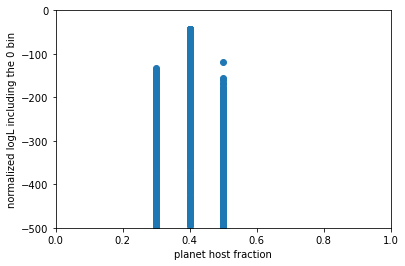

In [261]:
%matplotlib inline

plt.scatter(df.f, df.normalized_logL_zero_bin)
plt.xlabel('planet host fraction')
plt.ylabel('normalized logL including the 0 bin')
plt.ylim([-500, 0])
plt.xlim([0, 1])
plt.savefig('paper/f_v_logL.pdf', format='pdf')
plt.show()

Models are, across the board, worse using the new observed transit multiplicity with the koi_score (vs koi_disposition) cut, *at least when I use the 0+ bin)*. But at least it's consistent for the 3D "good" surface shape and the previously favored planet host fraction of 0.2.

Shoot, this was the case for koi_score>0.9. But with koi_score>0.5, I now seem to favor a planet-host fraction of 0.3.

#### Intact fraction vs normalized (1+ bin) logL

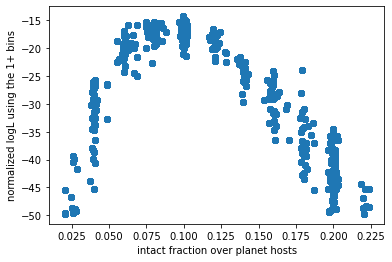

In [262]:
plt.scatter(df_keep.intact_frac2, df_keep.normalized_logL)
plt.xlabel('intact fraction over planet hosts')
plt.ylabel('normalized logL using the 1+ bins')
plt.savefig('paper/intact_v_logL.pdf', format='pdf')
plt.show()

#### Fraction of cold vs hot systems

Recreating Moriarty & Ballard 2016

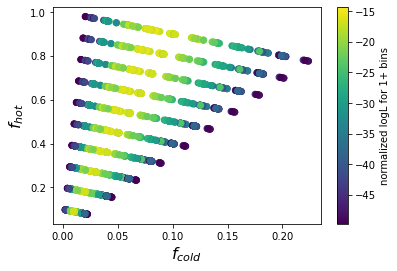

In [263]:
f_cool = df_keep.intact_frac2*df_keep.f
f_hot = df_keep.disrupted_frac2*df_keep.f
plt.scatter(f_cool, f_hot, c=df_keep.normalized_logL)
plt.xlabel('$f_{cold}$', fontsize=16)
plt.ylabel('$f_{hot}$', fontsize=16)
cbar = plt.colorbar()
cbar.set_label('normalized logL for 1+ bins')
plt.savefig('paper/cold_v_hot.pdf', format='pdf')
plt.show()

#### Intermediate cuts

In [264]:
df_not_keep = df.loc[~(df.normalized_logL > -50)]

### second wave of cuts
df_keep2 = df_keep.loc[(np.round(df_keep.f,1) == 0.3) & (df_keep.normalized_logL_zero_bin > -100)]
df_not_keep2 = df_keep.loc[~(np.round(df_keep.f,1) == 0.3) | ~(df_keep.normalized_logL_zero_bin > -100)]
print(len(df_keep2), len(df_not_keep2), len(df_keep))

### assess again
# tossed out models
print(len(df_not_keep2.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep2.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# total models, if we count one model per 4-d sub-cube
print(len(df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

0 4290 4290
1520
0
14641


In [265]:
df_keep3 = df_keep.loc[np.round(df_keep.f,1) == 0.3]
df_not_keep3 = df_keep.loc[~(np.round(df_keep.f,1) == 0.3)]
df_keep4 = df_keep.loc[df_keep.normalized_logL_zero_bin > -250]
df_not_keep4 = df_keep.loc[~(df_keep.normalized_logL_zero_bin > -250)]
df_keep5 = df_keep.loc[np.round(df_keep.f,1) == 0.4]
df_not_keep5 = df_keep.loc[~(np.round(df_keep.f,1) == 0.4)]
print(len(df_keep3), len(df_not_keep3), len(df_keep4), len(df_not_keep4), len(df_keep5), len(df_not_keep5), len(df_keep))

### assess again
# tossed out models
print(len(df_not_keep3.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep3.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# tossed out models
print(len(df_not_keep4.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep4.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# tossed out models
print(len(df_not_keep5.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# surviving models
print(len(df_keep5.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

# total models, if we count one model per 4-d sub-cube
print(len(df_keep.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index()))

429 3861 233 4057 429 3861 4290
1368
152
1455
106
1368
152
1520


In [66]:
df_keep4.drop_duplicates(subset=['m','b','c','f'])

,filename,m,b,c,f,logL,transit_multiplicity,geom_transit_multiplicity,intact_frac,disrupted_frac,...,transit_multiplicity_zero_bin,normalized_transit_multiplicity,normalized_transit_multiplicity_zero_bin,normalized_logL,normalized_logL_zero_bin,likelihood,normalized_likelihood,normalized_likelihood_zero_bin,fixed_c,redundant
372,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.3,-47.411581,"[710.4000000000001, 87.00000000000001, 27.9000...","[2, 31351, 30877, 43, 78, 3374, 3520, 13, 21, ...",0.086392,0.213603,...,"[67398.4, 710.4000000000001, 87.00000000000001...","[687.8395415472779, 84.23710601719198, 27.0139...","[65258.00191021966, 687.8395415472779, 84.2371...",-23.043201,-128.443511,2.566917e-21,9.827997e-11,1.650791e-56,1.000000e+08,True
1459,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.4,1.000000e+08,0.2,-115.933286,"[529.6, 128.0, 64.2, 30.200000000000003, 8.0, ...","[1, 20763, 20887, 37, 18, 13723, 13776, 42, 18...",0.141485,0.058514,...,"[67475.0, 529.6, 128.0, 64.2, 30.2000000000000...","[564.396320630749, 136.40998685939553, 68.4181...","[71908.31143232589, 564.396320630749, 136.4099...",-45.785826,-200.374442,4.475211e-51,1.304574e-20,9.516678e-88,1.000000e+08,True
1846,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.5,1.584893e+08,0.3,-48.624322,"[730.8000000000001, 78.9, 23.700000000000003, ...","[1, 31068, 31230, 104, 55, 3379, 3439, 11, 8, 2]",0.085729,0.214269,...,"[67384.9, 730.8000000000001, 78.9, 23.70000000...","[696.3679943602397, 75.1825872400423, 22.58336...","[64210.02690635646, 696.3679943602397, 75.1825...",-29.350937,-189.822119,7.633525e-22,1.790812e-13,3.641676e-83,1.584893e+08,True
3320,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.9,2.511886e+08,0.3,-42.832148,"[728.1000000000001, 89.10000000000001, 24.6000...","[31110, 31256, 3468, 3462, 0.0, 0.0, 0.0]",0.086793,0.213207,...,"[67378.3, 728.1000000000001, 89.10000000000001...","[688.4564533053515, 84.24868835257082, 23.2605...","[63709.690218024945, 688.4564533053515, 84.248...",-24.294583,-219.071741,2.501696e-19,2.811878e-11,7.216918e-96,2.511886e+08,True
4344,/blue/sarahballard/c.lam/sculpting2/simulation...,-1.8,0.1,1.000000e+08,0.3,-45.453502,"[733.2000000000002, 82.80000000000001, 26.4000...","[30929, 31377, 3475, 3515, 0.0, 0.0, 0.0]",0.087323,0.212677,...,"[67380.4, 733.2000000000002, 82.80000000000001...","[694.9803646563815, 78.48387096774194, 25.0238...","[63868.05095839175, 694.9803646563815, 78.4838...",-26.262309,-210.154174,1.818841e-20,3.930287e-12,5.385198e-92,1.000000e+08,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40379,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.1,6.309573e+08,0.3,-45.624517,"[742.8000000000001, 86.70000000000002, 20.7000...","[31219, 31047, 3508, 3522, 0.0, 0.0, 0.0]",0.087901,0.212099,...,"[67375.0, 742.8000000000001, 86.70000000000002...","[699.6641114982579, 81.66515679442509, 19.4979...","[63462.398373983735, 699.6641114982579, 81.665...",-27.559306,-240.719063,1.532937e-20,1.074350e-12,2.864436e-105,1.000000e+08,True
40412,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.1,1.000000e+09,0.3,-44.131650,"[732.6000000000001, 82.80000000000001, 28.5000...","[31146, 31227, 3427, 3496, 0.0, 0.0, 0.0]",0.086806,0.213194,...,"[67377.7, 732.6000000000001, 82.80000000000001...","[692.2271932890598, 78.23698007689619, 26.9293...","[63664.58662472327, 692.2271932890598, 78.2369...",-25.625332,-223.734033,6.821315e-20,7.431209e-12,6.816227e-98,1.000000e+08,True
40446,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.1,1.584893e+09,0.3,-46.162756,"[734.4000000000001, 83.4, 22.500000000000004, ...","[31221, 31167, 3516, 3392, 0.0, 0.0, 0.0]",0.086545,0.213455,...,"[67380.7, 734.4000000000001, 83.4, 22.50000000...","[696.3619782532445, 79.08032269379166, 21.3346...","[63890.737402081126, 696.3619782532445, 79.080...",-27.295602,-209.244467,8.948904e-21,1.398526e-12,1.337465e-91,1.000000e+0

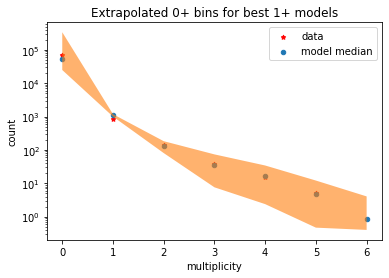

In [266]:
%matplotlib inline
from itertools import zip_longest
import numpy.ma as ma # for masked arrays

lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep.normalized_transit_multiplicity_zero_bin):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(np.nanmax(elt))
    lam_elt_min.append(np.nanmin(elt))
    lam_elt_med.append(np.nanmedian(elt))
    
# plotting
plt.scatter(np.arange(7), nonzero_k, marker=(5, 1), color='r', s=20, label='data')
plt.scatter(np.arange(7), lam_elt_med, s=20, label='model median')
#plt.scatter(np.arange(7), lam_elt_max, s=16)
#plt.scatter(np.arange(7), lam_elt_min, s=16)
        
# draw envelope
plt.fill_between(np.arange(len(lam_elt_min)), lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Extrapolated 0+ bins for best 1+ models')
plt.legend()
plt.savefig('paper/best_models_0bin_included.pdf', format='pdf')
plt.show()

Same as above, but with just the 1+ bins

[1002.1433799068529, 80.53153153153153, 7.561806069578091, 2.3674453096032626, 0.46639883126369613, 0.3988132417239225] [1089.6091624910523, 129.9311408016444, 36.472688325598, 16.256011315417258, 4.867290367290368, 0.8507721977731764] [1182.087837837838, 183.09614105123086, 73.5357025337282, 34.14215846103684, 12.066141732283468, 4.034755134281201]


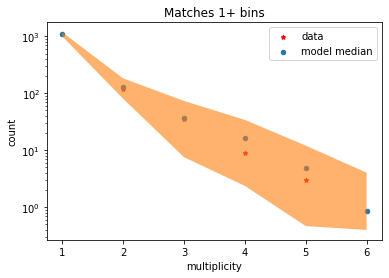

In [267]:
%matplotlib inline
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep.normalized_transit_multiplicity):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(np.nanmax(elt))
    lam_elt_min.append(np.nanmin(elt))
    lam_elt_med.append(np.nanmedian(elt))
    
# plotting
plt.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label='data')
plt.scatter(np.arange(7)[1:], lam_elt_med, s=20, label='model median')
#plt.scatter(np.arange(7)[1:], lam_elt_max, s=16)
#plt.scatter(np.arange(7)[1:], lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(7)[1:], lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Matches 1+ bins')
plt.legend()
plt.savefig('paper/best_models.pdf', format='pdf')
plt.show()

Best 0+ and 1+ matches

In [268]:
len(df_keep4.groupby(['m', 'b', 'c', 'f']))

106

[1002.1433799068529, 84.46148064637354, 8.121586232697343, 2.8793686583990983, 0.47649253731343283, 0.3988132417239226] [1034.569200132758, 155.30531677809614, 53.53946937438585, 23.396069287141906, 6.4515314177455005, 0.8507721977731765] [1179.1014656144307, 183.09614105123086, 73.5357025337282, 34.14215846103684, 12.066141732283464, 4.034755134281201]


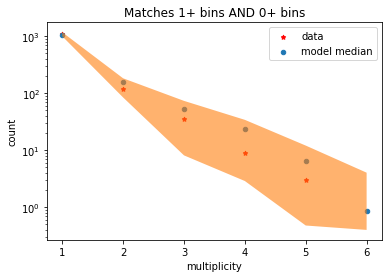

In [269]:
lam_elt_max = []
lam_elt_min = []
lam_elt_med = []
for temp_list in zip_longest(*df_keep4.normalized_transit_multiplicity):
    elt = [0 if v is None else v for v in ma.masked_values(temp_list, 0)]
    lam_elt_max.append(np.nanmax(elt))
    lam_elt_min.append(np.nanmin(elt))
    lam_elt_med.append(np.nanmedian(elt))
    
# plotting
plt.scatter(np.arange(7)[1:], k, marker=(5, 1), color='r', s=20, label='data')
plt.scatter(np.arange(7)[1:], lam_elt_med, s=20, label='model median')
#plt.scatter(np.arange(7)[1:], lam_elt_max, s=16)
#plt.scatter(np.arange(7)[1:], lam_elt_min, s=16)
        
print(lam_elt_min, lam_elt_med, lam_elt_max)
# draw envelope
plt.fill_between(np.arange(7)[1:], lam_elt_min, lam_elt_max, alpha=0.6)

plt.yscale('log')
plt.xlabel('multiplicity')
plt.ylabel('count')
plt.title('Matches 1+ bins AND 0+ bins')
plt.legend()
plt.savefig('paper/best_models_to_0_and_1.pdf', format='pdf')
plt.show()

#### Marginalized and 2D marginalized posteriors

8.13800195890211e-169 8.429851661263648e-06 3.77236461572206e-05


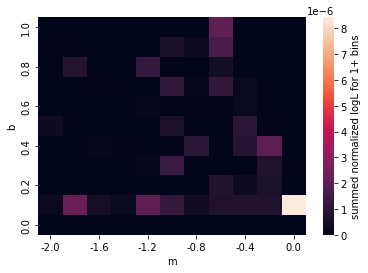

In [270]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "m","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=np.sort(df.m.unique().round(1)), yticklabels=np.sort(df.b.unique().round(1)),
                cbar_kws={'label': 'summed normalized logL for 1+ bins'})
#ax = sns.heatmap(np.log10(piv), xticklabels=df.m.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.savefig('paper/m_vs_b.pdf', format='pdf')
plt.show()

In [271]:
def find_confidence_interval(array, percentile):
    #### manually find peak and then creep outward until I've taken over blah% area under the marginalized posterior
    
    # stopping criterion
    stop = 0.01*percentile*np.sum(array) 
    
    # initialize at peak likelihood
    area = 0
    arg = np.argmax(array)
    peak_arg = arg # save this off for function return
    area += array[arg]
    
    # probe step to the left and right
    # this strategy is based on looking at the shape of the posteriors
    # otherwise I'd be more worried about falling into local extrema
    left = arg-1
    right = arg+1
    try: 
        left_val = array[left]
    except:
        left_val = 0
    try:
        right_val = array[right]
    except:
        right_val = 0
        
    # if both left and right steps are successful, take the higher value 
    if left_val > right_val:
        direction = "left"
    else:
        direction = "right"
        
    while area < stop:            
        if direction == "left":
            arg -= 1
        elif direction == "right":
            arg += 1
            
        # update total area
        area += array[arg]
    
    return area, arg, peak_arg

3.7723646157220596e-05
3.77236461572206e-05
3.485764487893624e-05
4.236371173853485e-05
3.3178028811056364e-05
3.667521051948757e-05
0.7757956007828488 5 10


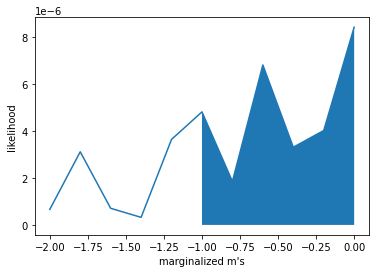

0.7245459281159919 5 1


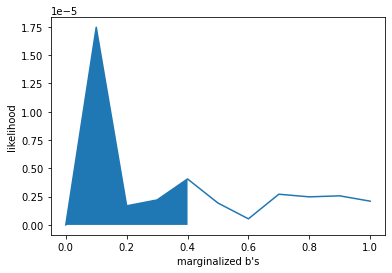

In [274]:
from numpy import trapz

b_vs_m = np.zeros(len(piv))
m_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    m_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    # if m==0, multiply the single collapsed m from all the redundant cutoffs by 11
    #if j==0:
    #    piv[j] = 11*piv[j]
    b_vs_m[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_m))
print(np.sum(m_vs_b))

print(simps(b_vs_m, dx=1))
print(simps(m_vs_b, dx=1))
print(trapz(b_vs_m, dx=1))
print(trapz(m_vs_b, dx=1))

area, arg, peak_arg = find_confidence_interval(b_vs_m, 68)
print(area/np.sum(b_vs_m), arg, peak_arg)
plt.plot(piv.columns, b_vs_m)
plt.fill_between(piv.columns[arg:peak_arg+1], b_vs_m[arg:peak_arg+1])
plt.xlabel("marginalized m's")
plt.ylabel('likelihood')
plt.savefig('paper/marginalized_m.pdf', format='pdf')
plt.show()

area, arg, peak_arg = find_confidence_interval(m_vs_b, 68)
print(area/np.sum(m_vs_b), arg, peak_arg)
plt.plot(piv.T.columns, m_vs_b)
plt.fill_between(piv.T.columns[peak_arg-1:arg], m_vs_b[peak_arg-1:arg])
plt.xlabel("marginalized b's")
plt.ylabel('likelihood')
plt.savefig('paper/marginalized_b.pdf', format='pdf')
plt.show()

5.996172272679917e-53 2.3026491484556006e-06 3.77236461572206e-05


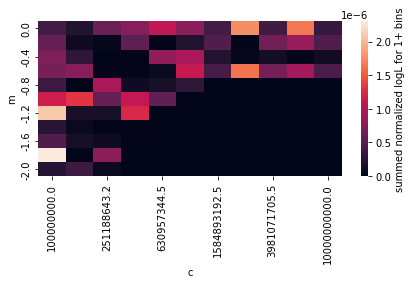

In [275]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index().groupby(['m','c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("m", "c","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=np.sort(df.c.unique().round(1)), yticklabels=np.sort(df.m.unique().round(1)),
                cbar_kws={'label': 'summed normalized logL for 1+ bins'})
#cbar = plt.colorbar(piv)
#ax = sns.heatmap(np.log10(piv), xticklabels=df.fixed_c.unique().round(1), yticklabels=df.m.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('paper/c_vs_m.pdf', format='pdf')
plt.show()

3.772364615722061e-05
3.77236461572206e-05
0.6907076858017114 5 0


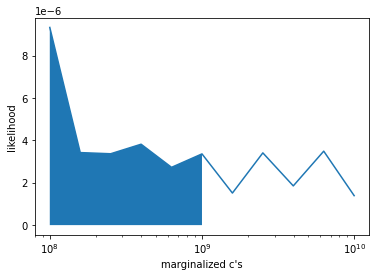

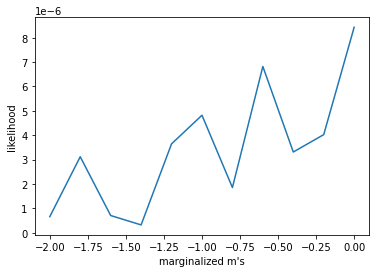

In [277]:
m_vs_c = np.zeros(len(piv))
c_vs_m = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    #if j==0: # if m==0 and I collapsed cutoffs down to it, multiply likelihood by 11 so it's not undercounted
        #piv.T[j] = 11*piv.T[j]
        #print(j)
    c_vs_m[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    m_vs_c[i] = np.nansum(piv[j])
    
print(np.sum(m_vs_c))
print(np.sum(c_vs_m))

#plt.plot(piv.columns, np.log10(m_vs_c))
area, arg, peak_arg = find_confidence_interval(m_vs_c, 68)
print(area/np.sum(m_vs_c), arg, peak_arg)
plt.plot(piv.columns, m_vs_c)
plt.fill_between(piv.columns[peak_arg:arg+1], m_vs_c[peak_arg:arg+1])
plt.xscale('log')
plt.xlabel("marginalized c's")
plt.ylabel('likelihood')
plt.savefig('paper/marginalized_c.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, c_vs_m)
plt.xlabel("marginalized m's")
plt.ylabel('likelihood')
plt.show()

1.9992040267213688e-168 9.340024687167931e-06 3.772364615722059e-05


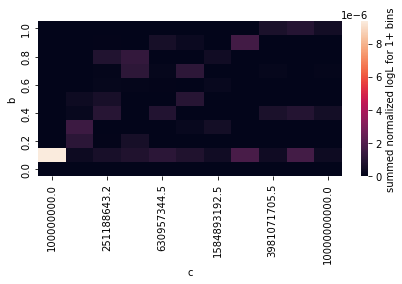

In [278]:
%matplotlib inline

###piv = df_keep.loc[df_keep.f == 0.2].groupby(['b','fixed_c','m']).mean('normalized_likelihood').reset_index().groupby(['b','m']).sum('normalized_likelihood').reset_index()
piv = df.groupby(['b','c','m','f']).mean('normalized_likelihood').reset_index().groupby(['b','c']).sum('normalized_likelihood').reset_index()
#piv['logged_normalized_likelihood'] = np.log(piv['normalized_likelihood'])
piv = piv.pivot("b", "c","normalized_likelihood")
print(np.nanmin(piv.values), np.nanmax(piv.values), np.nansum(piv.values))

fig, ax = plt.subplots()
ax = sns.heatmap(piv, xticklabels=np.sort(df.fixed_c.unique().round(1)), yticklabels=np.sort(df.b.unique().round(1)),
                cbar_kws={'label': 'summed normalized logL for 1+ bins'})
#ax = sns.heatmap(np.log10(piv), xticklabels=df.fixed_c.unique().round(1), yticklabels=df.b.unique().round(1))
#ax.yaxis.set_major_formatter(ticker.ScalarFormaN tter(useOffset=True, useMathText=True))
#sns.heatmap(piv, vmin=-455, vmax=-17.9)
ax.set_xticks(ax.get_xticks()[::2]) # sample every other tick, for cleanness
ax.set_yticks(ax.get_yticks()[::2]) # sample every other tick, for cleanness
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('paper/c_vs_b.pdf', format='pdf')
plt.show()

1.5649263667755488e-05
1.5649263667755488e-05


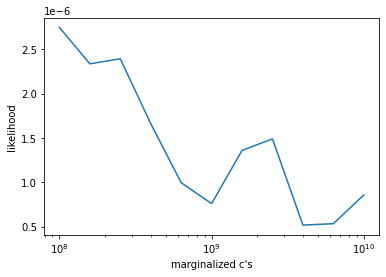

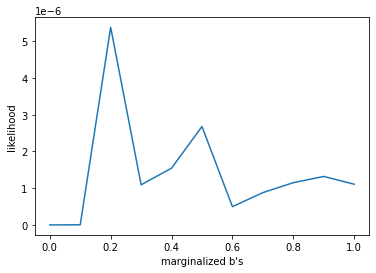

In [26]:
b_vs_c = np.zeros(len(piv))
c_vs_b = np.zeros(len(piv.T))

for i, j in enumerate(piv.T):
    c_vs_b[i] = np.nansum(piv.T[j])
    
for i, j in enumerate(piv):
    b_vs_c[i] = np.nansum(piv[j])
    
print(np.sum(b_vs_c))
print(np.sum(c_vs_b))

#plt.plot(piv.columns, np.log10(m_vs_c))
plt.plot(piv.columns, b_vs_c)
plt.xscale('log')
plt.xlabel("marginalized c's")
plt.ylabel('likelihood')
#plt.savefig('marginalized_m.pdf', format='pdf')
plt.show()

plt.plot(piv.T.columns, c_vs_b)
plt.xlabel("marginalized b's")
plt.ylabel('likelihood')
plt.show()

#### Multi:single ratios

In [316]:
pnum = pd.read_csv(path+'pnum_plus_cands_fgk_koiscore.csv')
#pnum = pd.read_csv(path+'pnum_plus_cands_fgk_fpp.csv')
pnum['iso_age_err'] = 0.5*(pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))
pnum_young = pnum.loc[pnum.iso_age < 2]
pnum_old = pnum.loc[pnum.iso_age >= 2]
#print(pnum.loc[pnum.koi_count==5].kepid.unique())


#print(pnum.loc[pnum.koi_count==5][['kepid','koi_count','iso_age']])

In [317]:
def calculate_multiplicity_ratio(row):
    multis = np.sum(row[1:])
    singles = row[0]
    return multis/singles

print(df_keep.young20_transit_multiplicity.apply(pad))
print(df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio))

print(df_keep.old20_transit_multiplicity.apply(pad))
print(df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio))

print(np.sum(k[1:])/k[0])
pnum.groupby('kepid').size().to_frame('kepid_count').reset_index()
#pnum['count'] = pnum.groupby('kepid').transform('count')

366        [31.5, 3.5, 1.0, 0.30000000000000004, 0.0, 0.0]
367                        [35.6, 3.7, 0.8, 0.4, 0.0, 0.0]
368      [34.5, 2.3000000000000003, 0.6000000000000001,...
369         [63.0, 7.0, 2.0, 0.6000000000000001, 0.0, 0.0]
370                        [71.2, 7.4, 1.6, 0.8, 0.0, 0.0]
                               ...                        
40957                   [292.8, 48.0, 10.4, 6.4, 4.0, 0.0]
40959     [291.6, 36.9, 23.400000000000002, 8.1, 3.6, 0.0]
40960    [329.40000000000003, 54.0, 11.700000000000001,...
40962                   [324.0, 41.0, 26.0, 9.0, 4.0, 0.0]
40963                   [366.0, 60.0, 13.0, 8.0, 5.0, 0.0]
Name: young20_transit_multiplicity, Length: 4290, dtype: object
366      0.152381
367      0.137640
368      0.095652
369      0.152381
370      0.137640
           ...   
40957    0.234973
40959    0.246914
40960    0.234973
40962    0.246914
40963    0.234973
Name: young20_transit_multiplicity, Length: 4290, dtype: float64
366       [205.3, 25.5, 

,kepid,kepid_count
0,1432789,2
1,1575873,1
2,1725016,1
3,1871056,2
4,2161949,2
...,...,...
841,12602999,1
842,12644822,1
843,12645057,1
844,12737015,1


In [281]:
for thresh in np.linspace(1, 10, 19):
    systems = []
    for iteration in range(samples):
        unique_kepids = pnum.drop_duplicates(subset=['kepid'])
        #unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, unique_kepids.iso_age_err)
        #unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, 1.5)
        unique_kepids['iso_age_bootstrapped'] = np.random.uniform(unique_kepids.iso_age+unique_kepids.iso_age_err2, unique_kepids.iso_age+unique_kepids.iso_age_err1)
        unique_kepids = unique_kepids[['kepid', 'iso_age_bootstrapped']]
        pnum_temp = pnum.merge(unique_kepids, how='left', on='kepid')
        pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0].iso_age_bootstrapped = 0

        # CAUTION: there are some bootstrapped ages every sample that are negative age. But for our purposes, we still call them 'young'
        #print(pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0][['iso_age', 'iso_age_err']])

        temp_young = pnum_temp.loc[pnum_temp.iso_age_bootstrapped <= thresh]
        #print(temp_young[['kepid','iso_age','iso_age_err','iso_age_bootstrapped']])
        #print(len(temp_young), len(temp_young.kepid.unique()))
        #temp_old = pnum_temp.loc[pnum_temp.iso_age_bootstrapped > thresh]
        systems.append(len(temp_young.kepid.unique()))
        
        #young_data = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #old_data = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid

        #plt.scatter(np.arange(len(young_data)+1)[1:], young_data)
        #plt.scatter(np.arange(len(old_data)+1)[1:], old_data)
        
    print(len(pnum.loc[pnum.iso_age <= thresh].kepid.unique()), np.median(systems))

14 19.0
79 80.0
156 156.0
248 240.0
328 320.0
400 397.0
483 476.0
569 552.0
634 625.0
695 699.0
761 769.0
821 832.0
876 889.0
940 941.0
989 986.0
1038 1026.0
1072 1062.0
1107 1092.0
1136 1120.0


In [282]:
for thresh in np.linspace(1, 10, 19):
    systems = []
    for iteration in range(samples):
        unique_kepids = pnum.drop_duplicates(subset=['kepid'])
        #unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, unique_kepids.iso_age_err)
        #unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, 1.5)
        unique_kepids['iso_age_bootstrapped'] = np.random.uniform(unique_kepids.iso_age+unique_kepids.iso_age_err2, unique_kepids.iso_age+unique_kepids.iso_age_err1)
        unique_kepids = unique_kepids[['kepid', 'iso_age_bootstrapped']]
        pnum_temp = pnum.merge(unique_kepids, how='left', on='kepid')
        pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0].iso_age_bootstrapped = 0

        # CAUTION: there are some bootstrapped ages every sample that are negative age. But for our purposes, we still call them 'young'
        #print(pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0][['iso_age', 'iso_age_err']])

        temp_young = pnum_temp.loc[pnum_temp.iso_age_bootstrapped <= thresh]
        #print(temp_young[['kepid','iso_age','iso_age_err','iso_age_bootstrapped']])
        #print(len(temp_young), len(temp_young.kepid.unique()))
        #temp_old = pnum_temp.loc[pnum_temp.iso_age_bootstrapped > thresh]
        systems.append(len(temp_young.kepid.unique()))
        
        #young_data = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #old_data = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid

        #plt.scatter(np.arange(len(young_data)+1)[1:], young_data)
        #plt.scatter(np.arange(len(old_data)+1)[1:], old_data)
        
    print(len(pnum.loc[pnum.iso_age <= thresh].kepid.unique()), np.median(systems))

14 19.0
79 79.0
156 155.0
248 240.0
328 320.0
400 398.0
483 476.0
569 551.0
634 626.0
695 699.0
761 769.0
821 833.0
876 889.0
940 940.0
989 985.5
1038 1026.0
1072 1062.0
1107 1093.0
1136 1119.0


In [ ]:
bins = 27
young_ratios = []
old_ratios = []
for i, a in enumerate(np.linspace(0,13,bins)):
        temp_young = pnum.loc[pnum.iso_age <= a]
        temp_old = pnum.loc[pnum.iso_age > a]
        #print(len(temp_young), len(temp_old), len(pnum))
        
        k_temp_young = temp_young.koi_count.value_counts(sort=False) # this includes false positives!
        #print(list(k_temp_young))
        ###k_temp_young = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #print(list(k_temp_young))
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        
        k_temp_old = temp_old.koi_count.value_counts(sort=False) # this includes flase positives!
        ###k_temp_old = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k

        #print(np.sum(k_temp_young[1:])/k_temp_young[0], (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0])
        #print(k_temp_young)
        young_ratio = (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0]
        #young_ratio = k_temp_young[0]/np.sum(k_temp_young)
        young_ratios.append(young_ratio)
        
        old_ratio = (np.sum(k_temp_old)-k_temp_old[0])/k_temp_old[0]
        #old_ratio = k_temp_old[0]/np.sum(k_temp_old)
        old_ratios.append(old_ratio)
print(young_ratios)
plt.scatter(np.linspace(0,12,bins), young_ratios, c='#83adb5', label='young')
plt.scatter(np.linspace(0,12,bins), old_ratios, c='#5e3c58', label='old')
plt.ylim([0, 1])
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.show()

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

pnum = pd.read_csv(path+'pnum_plus_cands_fgk_koiscore.csv') # koi_score > 0.5
pnum = pd.read_csv(path+'pnum_plus_cands_fgk_fpp.csv') # fpp_prob <= 0.5
# we will be drawing from a Guassian with width equal to the average of err1 and err2
pnum['iso_age_err'] = 0.5*(pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

bins = 13*2+1
young_ratios_array = np.zeros(bins)
old_ratios_array = np.zeros(bins)
samples = 1000
young_ratios_all = []
old_ratios_all = []
young_multiplicities_all = []
old_multiplicities_all = []
len_young_multiplicities_all = []
len_old_multiplicities_all = []
for iteration in range(samples):
    unique_kepids = pnum.drop_duplicates(subset=['kepid'])
    unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, unique_kepids.iso_age_err)
    #unique_kepids['iso_age_bootstrapped'] = np.random.uniform(unique_kepids.iso_age+unique_kepids.iso_age_err2, unique_kepids.iso_age+unique_kepids.iso_age_err1)
    unique_kepids = unique_kepids[['kepid', 'iso_age_bootstrapped']]
    pnum_temp = pnum.merge(unique_kepids, how='left', on='kepid')
    #print(pnum_temp)
    pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0].iso_age_bootstrapped = 0
        
    young_ratios = []
    old_ratios = []
    young_multiplicities = []
    old_multiplicities = []
    len_young_multiplicities = []
    len_old_multiplicities = []
    for i, a in enumerate(np.linspace(0,13,bins)):
        temp_young = pnum_temp.loc[pnum_temp.iso_age_bootstrapped <= a]
        temp_old = pnum_temp.loc[pnum_temp.iso_age_bootstrapped > a]
        #print(len(temp_young), len(temp_old), len(pnum))
        len_young_multiplicities.append(len(temp_young.kepid.unique()))
        len_old_multiplicities.append(len(temp_old.kepid.unique()))
        
        ###k_temp_young = temp_young.koi_count.value_counts(sort=False) # this includes false positives!
        #print(list(k_temp_young))
        k_temp_young = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        
        #print(list(k_temp_young))
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        young_multiplicities.append(k_temp_young)
        
        ###k_temp_old = temp_old.koi_count.value_counts(sort=False) # this includes flase positives!
        k_temp_old = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k
        old_multiplicities.append(k_temp_old)
        
        #print(np.sum(k_temp_young[1:])/k_temp_young[0], (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0])
        #print(k_temp_young)
        young_ratio = (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0]
        #young_ratio = k_temp_young[0]/np.sum(k_temp_young)
        young_ratios.append(young_ratio)
        
        old_ratio = (np.sum(k_temp_old)-k_temp_old[0])/k_temp_old[0]
        #old_ratio = k_temp_old[0]/np.sum(k_temp_old)
        old_ratios.append(old_ratio)
        
        #print(k_temp_young, k_temp_old, np.sum(k_temp_young), np.sum(k_temp_old), young_ratio, old_ratio)
    #adsfadf
    """
    try:
        young_ratios_array += np.array(young_ratios)
    except Exception as e:
        print(e)
        asdfadf
        
    try:
        old_ratios_array += np.array(old_ratios)
    except Exception as e:
        print(e)
        asdfadf
    """
    young_ratios_all.append(young_ratios)
    old_ratios_all.append(old_ratios)
    
    young_multiplicities_all.append(young_multiplicities)
    old_multiplicities_all.append(old_multiplicities)
    
    len_young_multiplicities_all.append(len_young_multiplicities)
    len_old_multiplicities_all.append(len_old_multiplicities)

# plot bootstrapped data multi:single ratios
n_std = 3
plt.scatter(np.linspace(0,12,bins), np.median(np.array(young_ratios_all), axis=0), c='#83adb5', label='young')
plt.scatter(np.linspace(0,12,bins), np.median(np.array(old_ratios_all), axis=0), c='#5e3c58', label='old')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)+np.std(np.array(ratios_all), axis=0), marker='+')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)-np.std(np.array(ratios_all), axis=0), marker='-')

young_fill = plt.fill_between(np.linspace(0,13,bins), np.percentile(young_ratios_all, 0.3, axis=0),
                 np.percentile(young_ratios_all, 99.7, axis=0), alpha=0.5, color='#83adb5')
old_fill = plt.fill_between(np.linspace(0,13,bins), np.percentile(old_ratios_all, 0.3, axis=0),
                 np.percentile(old_ratios_all, 99.7, axis=0), alpha=0.5, color='#5e3c58')

# turn fill_betweens into shapely Polygon objects for contains-ing
young_fill = Polygon(young_fill.get_paths()[0].vertices)
old_fill = Polygon(old_fill.get_paths()[0].vertices)

# plot model multi:single ratios
plt.scatter(np.ones(len(df_keep))*1., df_keep.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r', label='best models, young')
plt.scatter(np.ones(len(df_keep))*1., df_keep.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink', label='best models, old')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2., df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2., df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3., df_keep.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3., df_keep.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4., df_keep.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4., df_keep.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*5., df_keep.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*5., df_keep.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')

plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.ylim(0.0, 1)
plt.legend()
plt.tight_layout()
plt.savefig('paper/observed_and_best_model_multi_ratios.pdf', format='pdf')
plt.show()
    

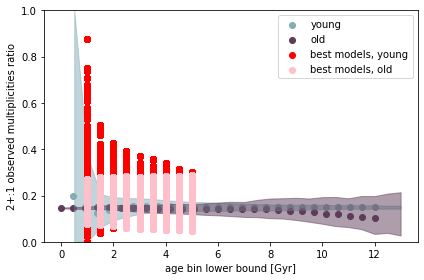

In [318]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

pnum = pd.read_csv(path+'pnum_plus_cands_fgk_koiscore.csv') # koi_score > 0.5
pnum = pd.read_csv(path+'pnum_plus_cands_fgk_fpp.csv') # fpp_prob <= 0.5
# we will be drawing from a Guassian with width equal to the average of err1 and err2
pnum['iso_age_err'] = 0.5*(pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

bins = 13*2+1
young_ratios_array = np.zeros(bins)
old_ratios_array = np.zeros(bins)
samples = 1000
young_ratios_all = []
old_ratios_all = []
young_multiplicities_all = []
old_multiplicities_all = []
len_young_multiplicities_all = []
len_old_multiplicities_all = []
for iteration in range(samples):
    unique_kepids = pnum.drop_duplicates(subset=['kepid'])
    unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, unique_kepids.iso_age_err)
    #unique_kepids['iso_age_bootstrapped'] = np.random.uniform(unique_kepids.iso_age+unique_kepids.iso_age_err2, unique_kepids.iso_age+unique_kepids.iso_age_err1)
    unique_kepids = unique_kepids[['kepid', 'iso_age_bootstrapped']]
    pnum_temp = pnum.merge(unique_kepids, how='left', on='kepid')
    #print(pnum_temp)
    pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0].iso_age_bootstrapped = 0
        
    young_ratios = []
    old_ratios = []
    young_multiplicities = []
    old_multiplicities = []
    len_young_multiplicities = []
    len_old_multiplicities = []
    for i, a in enumerate(np.linspace(0,13,bins)):
        temp_young = pnum_temp.loc[pnum_temp.iso_age_bootstrapped <= a]
        temp_old = pnum_temp.loc[pnum_temp.iso_age_bootstrapped > a]
        #print(len(temp_young), len(temp_old), len(pnum))
        len_young_multiplicities.append(len(temp_young.kepid.unique()))
        len_old_multiplicities.append(len(temp_old.kepid.unique()))
        
        ###k_temp_young = temp_young.koi_count.value_counts(sort=False) # this includes false positives!
        #print(list(k_temp_young))
        k_temp_young = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        
        #print(list(k_temp_young))
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        young_multiplicities.append(k_temp_young)
        
        ###k_temp_old = temp_old.koi_count.value_counts(sort=False) # this includes flase positives!
        k_temp_old = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k
        old_multiplicities.append(k_temp_old)
        
        #print(np.sum(k_temp_young[1:])/k_temp_young[0], (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0])
        #print(k_temp_young)
        young_ratio = (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0]
        #young_ratio = k_temp_young[0]/np.sum(k_temp_young)
        young_ratios.append(young_ratio)
        
        old_ratio = (np.sum(k_temp_old)-k_temp_old[0])/k_temp_old[0]
        #old_ratio = k_temp_old[0]/np.sum(k_temp_old)
        old_ratios.append(old_ratio)
        
        #print(k_temp_young, k_temp_old, np.sum(k_temp_young), np.sum(k_temp_old), young_ratio, old_ratio)
    #adsfadf
    """
    try:
        young_ratios_array += np.array(young_ratios)
    except Exception as e:
        print(e)
        asdfadf
        
    try:
        old_ratios_array += np.array(old_ratios)
    except Exception as e:
        print(e)
        asdfadf
    """
    young_ratios_all.append(young_ratios)
    old_ratios_all.append(old_ratios)
    
    young_multiplicities_all.append(young_multiplicities)
    old_multiplicities_all.append(old_multiplicities)
    
    len_young_multiplicities_all.append(len_young_multiplicities)
    len_old_multiplicities_all.append(len_old_multiplicities)

# plot bootstrapped data multi:single ratios
n_std = 1
plt.scatter(np.linspace(0,12,bins), np.median(np.array(young_ratios_all), axis=0), c='#83adb5', label='young')
plt.scatter(np.linspace(0,12,bins), np.median(np.array(old_ratios_all), axis=0), c='#5e3c58', label='old')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)+np.std(np.array(ratios_all), axis=0), marker='+')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)-np.std(np.array(ratios_all), axis=0), marker='-')

young_fill = plt.fill_between(np.linspace(0,13,bins), np.percentile(young_ratios_all, 0.3, axis=0),
                 np.percentile(young_ratios_all, 99.7, axis=0), alpha=0.5, color='#83adb5')
old_fill = plt.fill_between(np.linspace(0,13,bins), np.percentile(old_ratios_all, 0.3, axis=0),
                 np.percentile(old_ratios_all, 99.7, axis=0), alpha=0.5, color='#5e3c58')

# turn fill_betweens into shapely Polygon objects for contains-ing
young_fill = Polygon(young_fill.get_paths()[0].vertices)
old_fill = Polygon(old_fill.get_paths()[0].vertices)

# plot model multi:single ratios
plt.scatter(np.ones(len(df_keep))*1., df_keep.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r', label='best models, young')
plt.scatter(np.ones(len(df_keep))*1., df_keep.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink', label='best models, old')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2., df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2., df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3., df_keep.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3., df_keep.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4., df_keep.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4., df_keep.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*5., df_keep.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*5., df_keep.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')

plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.ylim(0.0, 1)
plt.legend()
plt.tight_layout()
#plt.savefig('paper/observed_and_best_model_multi_ratios.pdf', format='pdf')
plt.show()
    

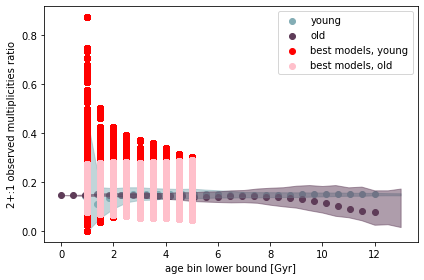

In [286]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

pnum = pd.read_csv(path+'pnum_plus_cands_fgk_koiscore.csv') # koi_score > 0.5
pnum = pd.read_csv(path+'pnum_plus_cands_fgk_fpp.csv') # fpp_prob <= 0.5
# we will be drawing from a Guassian with width equal to the average of err1 and err2
pnum['iso_age_err'] = 0.5*(pnum.iso_age_err1 + np.abs(pnum.iso_age_err2))

#fig, axes = plt.subplots(3,4, figsize=(25, 20), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = 0.2, wspace=0.4)
#axes = axes.ravel()

bins = 13*2+1
young_ratios_array = np.zeros(bins)
old_ratios_array = np.zeros(bins)
samples = 1000
young_ratios_all = []
old_ratios_all = []
young_multiplicities_all = []
old_multiplicities_all = []
len_young_multiplicities_all = []
len_old_multiplicities_all = []
for iteration in range(samples):
    unique_kepids = pnum.drop_duplicates(subset=['kepid'])
    #unique_kepids['iso_age_bootstrapped'] = np.random.normal(unique_kepids.iso_age, unique_kepids.iso_age_err)
    unique_kepids['iso_age_bootstrapped'] = np.random.uniform(unique_kepids.iso_age+unique_kepids.iso_age_err2, unique_kepids.iso_age+unique_kepids.iso_age_err1)
    unique_kepids = unique_kepids[['kepid', 'iso_age_bootstrapped']]
    pnum_temp = pnum.merge(unique_kepids, how='left', on='kepid')
    #print(pnum_temp)
    pnum_temp.loc[pnum_temp.iso_age_bootstrapped < 0].iso_age_bootstrapped = 0
        
    young_ratios = []
    old_ratios = []
    young_multiplicities = []
    old_multiplicities = []
    len_young_multiplicities = []
    len_old_multiplicities = []
    for i, a in enumerate(np.linspace(0,13,bins)):
        temp_young = pnum_temp.loc[pnum_temp.iso_age_bootstrapped <= a]
        temp_old = pnum_temp.loc[pnum_temp.iso_age_bootstrapped > a]
        #print(len(temp_young), len(temp_old), len(pnum))
        len_young_multiplicities.append(len(temp_young.kepid.unique()))
        len_old_multiplicities.append(len(temp_old.kepid.unique()))
        
        ###k_temp_young = temp_young.koi_count.value_counts(sort=False) # this includes false positives!
        #print(list(k_temp_young))
        k_temp_young = temp_young.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        
        #print(list(k_temp_young))
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_young = list(k_temp_young)
        k_temp_young += [0.] * (6 - len(k_temp_young)) # pad with zeros to match length of k
        young_multiplicities.append(k_temp_young)
        
        ###k_temp_old = temp_old.koi_count.value_counts(sort=False) # this includes flase positives!
        k_temp_old = temp_old.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count().kepid
        #k_temp = k_temp*np.sum(k)/np.sum(k_temp)
        #k_temp = k_temp/k_temp[1]
        k_temp_old = list(k_temp_old)
        k_temp_old += [0.] * (6 - len(k_temp_old)) # pad with zeros to match length of k
        old_multiplicities.append(k_temp_old)
        
        #print(np.sum(k_temp_young[1:])/k_temp_young[0], (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0])
        #print(k_temp_young)
        young_ratio = (np.sum(k_temp_young)-k_temp_young[0])/k_temp_young[0]
        #young_ratio = k_temp_young[0]/np.sum(k_temp_young)
        young_ratios.append(young_ratio)
        
        old_ratio = (np.sum(k_temp_old)-k_temp_old[0])/k_temp_old[0]
        #old_ratio = k_temp_old[0]/np.sum(k_temp_old)
        old_ratios.append(old_ratio)
        
        #print(k_temp_young, k_temp_old, np.sum(k_temp_young), np.sum(k_temp_old), young_ratio, old_ratio)
    #adsfadf
    """
    try:
        young_ratios_array += np.array(young_ratios)
    except Exception as e:
        print(e)
        asdfadf
        
    try:
        old_ratios_array += np.array(old_ratios)
    except Exception as e:
        print(e)
        asdfadf
    """
    young_ratios_all.append(young_ratios)
    old_ratios_all.append(old_ratios)
    
    young_multiplicities_all.append(young_multiplicities)
    old_multiplicities_all.append(old_multiplicities)
    
    len_young_multiplicities_all.append(len_young_multiplicities)
    len_old_multiplicities_all.append(len_old_multiplicities)

# plot bootstrapped data multi:single ratios
n_std = 1
plt.scatter(np.linspace(0,12,bins), np.median(np.array(young_ratios_all), axis=0), c='#83adb5', label='young')
plt.scatter(np.linspace(0,12,bins), np.median(np.array(old_ratios_all), axis=0), c='#5e3c58', label='old')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)+np.std(np.array(ratios_all), axis=0), marker='+')
#plt.scatter(np.linspace(0,12,bins), np.mean(np.array(ratios_all), axis=0)-np.std(np.array(ratios_all), axis=0), marker='-')

young_fill = plt.fill_between(np.linspace(0,13,bins), np.percentile(young_ratios_all, 0.3, axis=0),
                 np.percentile(young_ratios_all, 99.7, axis=0), alpha=0.5, color='#83adb5')
old_fill = plt.fill_between(np.linspace(0,13,bins), np.percentile(old_ratios_all, 0.3, axis=0),
                 np.percentile(old_ratios_all, 99.7, axis=0), alpha=0.5, color='#5e3c58')

# turn fill_betweens into shapely Polygon objects for contains-ing
young_fill = Polygon(young_fill.get_paths()[0].vertices)
old_fill = Polygon(old_fill.get_paths()[0].vertices)

# plot model multi:single ratios
plt.scatter(np.ones(len(df_keep))*1., df_keep.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r', label='best models, young')
plt.scatter(np.ones(len(df_keep))*1., df_keep.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink', label='best models, old')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*1.5, df_keep.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2., df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2., df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*2.5, df_keep.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3., df_keep.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3., df_keep.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*3.5, df_keep.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4., df_keep.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4., df_keep.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*4.5, df_keep.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')
plt.scatter(np.ones(len(df_keep))*5., df_keep.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='r')
plt.scatter(np.ones(len(df_keep))*5., df_keep.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio), 
                    c='pink')

plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
#plt.ylim(0.0, 1)
plt.legend()
plt.tight_layout()
#plt.savefig('paper/observed_and_best_model_multi_ratios.pdf', format='pdf')
plt.show()
    

In [201]:
np.array(young_multiplicities_all).shape

(1000, 27, 6)

Output 10000 multiplicity sets for Sarah

In [288]:
young_multiplicities_df = pd.DataFrame(young_multiplicities_all, 
                                       columns = ['0','0.5','1','1.5','2','2.5','3','3.5','4','4.5','5',
                                                 '5.5','6','6.5','7','7.5','8','8.5','9','9.5','10','10.5',
                                                 '11','11.5','12','12.5','13'])
old_multiplicities_df = pd.DataFrame(old_multiplicities_all, 
                                       columns = ['0','0.5','1','1.5','2','2.5','3','3.5','4','4.5','5',
                                                 '5.5','6','6.5','7','7.5','8','8.5','9','9.5','10','10.5',
                                                 '11','11.5','12','12.5','13'])
young_multiplicities_df.to_csv('young_multiplicities.csv')
old_multiplicities_df.to_csv('old_multiplicities.csv')

len_young_multiplicities_df = pd.DataFrame(len_young_multiplicities_all, 
                                       columns = ['0','0.5','1','1.5','2','2.5','3','3.5','4','4.5','5',
                                                 '5.5','6','6.5','7','7.5','8','8.5','9','9.5','10','10.5',
                                                 '11','11.5','12','12.5','13'])
len_old_multiplicities_df = pd.DataFrame(len_old_multiplicities_all, 
                                       columns = ['0','0.5','1','1.5','2','2.5','3','3.5','4','4.5','5',
                                                 '5.5','6','6.5','7','7.5','8','8.5','9','9.5','10','10.5',
                                                 '11','11.5','12','12.5','13'])
len_young_multiplicities_df.to_csv('len_young_multiplicities.csv')
len_old_multiplicities_df.to_csv('len_old_multiplicities.csv')

In [319]:
df['young10_multiplicity_ratio'] = df.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old10_multiplicity_ratio'] = df.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young15_multiplicity_ratio'] = df.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old15_multiplicity_ratio'] = df.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young20_multiplicity_ratio'] = df.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old20_multiplicity_ratio'] = df.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young25_multiplicity_ratio'] = df.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old25_multiplicity_ratio'] = df.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young30_multiplicity_ratio'] = df.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old30_multiplicity_ratio'] = df.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young35_multiplicity_ratio'] = df.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old35_multiplicity_ratio'] = df.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young40_multiplicity_ratio'] = df.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old40_multiplicity_ratio'] = df.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young45_multiplicity_ratio'] = df.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old45_multiplicity_ratio'] = df.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['young50_multiplicity_ratio'] = df.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df['old50_multiplicity_ratio'] = df.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)

df_keep['young10_multiplicity_ratio'] = df_keep.young10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old10_multiplicity_ratio'] = df_keep.old10_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young15_multiplicity_ratio'] = df_keep.young15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old15_multiplicity_ratio'] = df_keep.old15_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young20_multiplicity_ratio'] = df_keep.young20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old20_multiplicity_ratio'] = df_keep.old20_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young25_multiplicity_ratio'] = df_keep.young25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old25_multiplicity_ratio'] = df_keep.old25_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young30_multiplicity_ratio'] = df_keep.young30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old30_multiplicity_ratio'] = df_keep.old30_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young35_multiplicity_ratio'] = df_keep.young35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old35_multiplicity_ratio'] = df_keep.old35_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young40_multiplicity_ratio'] = df_keep.young40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old40_multiplicity_ratio'] = df_keep.old40_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young45_multiplicity_ratio'] = df_keep.young45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old45_multiplicity_ratio'] = df_keep.old45_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['young50_multiplicity_ratio'] = df_keep.young50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)
df_keep['old50_multiplicity_ratio'] = df_keep.old50_transit_multiplicity.apply(pad).apply(calculate_multiplicity_ratio)

In [320]:
%matplotlib inline
check_flag = True
def plot_model_ratio(threshold, column, young_or_old, check_flag, first_or_not):
    """
    young_or_old: what color do I use
    check_flag: do I plot them all, or just those that fall within the fill_between polygon
    first_or_not: do I include a label
    """
    print(np.ones(len(df_keep))*threshold, np.array(column.apply(pad).apply(calculate_multiplicity_ratio)))
    if check_flag == False:
        if (young_or_old == 'young') & (first_or_not == True):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='r', label='best models, young')
        elif (young_or_old == 'old') & (first_or_not == True):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='pink', label='best models, old')
        elif (young_or_old == 'young') & (first_or_not == False):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='r')
        elif (young_or_old == 'old') & (first_or_not == False):
            plt.scatter(np.ones(len(df_keep))*threshold, column.apply(pad).apply(calculate_multiplicity_ratio), 
                        c='pink')
            
        plt.xlabel('age [Gyr]')
        plt.ylabel('2+:1 ratio')
        plt.show()
    
        return 
    
    elif check_flag == True:
        in_or_out = np.zeros(len(column))
        if (young_or_old == 'young') & (first_or_not == True):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = young_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='r', label='best models, young')
                    
        elif (young_or_old == 'old') & (first_or_not == True):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = old_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='pink', label='best models, old')
                    
        elif (young_or_old == 'young') & (first_or_not == False):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = young_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='r')
                    
        elif (young_or_old == 'old') & (first_or_not == False):
            for j, i in enumerate(column.apply(pad).apply(calculate_multiplicity_ratio)):
                truth_value = old_fill.contains(Point(threshold, i))
                in_or_out[j] = truth_value
                #if truth_value == True:
                #    plt.scatter(threshold, i, c='pink')
                
        return in_or_out

"""
in_or_out = plot_model_ratio(2., df_keep.young20_transit_multiplicity, 'young', True, True)
print(in_or_out, len(in_or_out))
print(in_or_out[in_or_out > 0], len(in_or_out[in_or_out > 0]))
"""

df_keep['multi_match_young10'] = plot_model_ratio(1., df_keep.young10_transit_multiplicity, 'young', True, True)
df_keep['multi_match_old10'] = plot_model_ratio(1., df_keep.old10_transit_multiplicity, 'old', True, True)
df_keep['multi_match_young15'] = plot_model_ratio(1.5, df_keep.young15_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old15'] = plot_model_ratio(1.5, df_keep.old15_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young20'] = plot_model_ratio(2., df_keep.young20_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old20'] = plot_model_ratio(2., df_keep.old20_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young25'] = plot_model_ratio(2.5, df_keep.young25_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old25'] = plot_model_ratio(2.5, df_keep.old25_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young30'] = plot_model_ratio(3., df_keep.young30_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old30'] = plot_model_ratio(3., df_keep.old30_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young35'] = plot_model_ratio(3.5, df_keep.young35_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old35'] = plot_model_ratio(3.5, df_keep.old35_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young40'] = plot_model_ratio(4., df_keep.young40_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old40'] = plot_model_ratio(4., df_keep.old40_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young45'] = plot_model_ratio(4.5, df_keep.young45_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old45'] = plot_model_ratio(4.5, df_keep.old45_transit_multiplicity, 'old', True, False)
df_keep['multi_match_young50'] = plot_model_ratio(5., df_keep.young50_transit_multiplicity, 'young', True, False)
df_keep['multi_match_old50'] = plot_model_ratio(5., df_keep.old50_transit_multiplicity, 'old', True, False)

#plt.xlabel('age [Gyr]')
#plt.ylabel('2+:1 ratio')
#plt.show()

[1. 1. 1. ... 1. 1. 1.] [0.21052632 0.16666667 0.19230769 ... 0.11428571 0.03333333 0.11428571]
[1. 1. 1. ... 1. 1. 1.] [0.17879949 0.1495693  0.14503236 ... 0.24528302 0.2424729  0.24528302]
[1.5 1.5 1.5 ... 1.5 1.5 1.5] [0.17361111 0.11627907 0.10240964 ... 0.19767442 0.2384106  0.19767442]
[1.5 1.5 1.5 ... 1.5 1.5 1.5] [0.17940647 0.1521197  0.14837153 ... 0.24681393 0.24008439 0.24681393]
[2. 2. 2. ... 2. 2. 2.] [0.15238095 0.13764045 0.09565217 ... 0.23497268 0.24691358 0.23497268]
[2. 2. 2. ... 2. 2. 2.] [0.18314661 0.15166517 0.15294627 ... 0.24490741 0.23896222 0.24490741]
[2.5 2.5 2.5 ... 2.5 2.5 2.5] [0.17659138 0.14285714 0.13721805 ... 0.25939177 0.25910931 0.25939177]
[2.5 2.5 2.5 ... 2.5 2.5 2.5] [0.17969165 0.15160494 0.1475719  ... 0.23894255 0.23532314 0.23894255]
[3. 3. 3. ... 3. 3. 3.] [0.1726283  0.14693878 0.14507042 ... 0.25555556 0.24210526 0.25555556]
[3. 3. 3. ... 3. 3. 3.] [0.18144928 0.15084102 0.14565106 ... 0.23864895 0.23922414 0.23864895]
[3.5 3.5 3.5 ...

In [321]:
keep10 = df_keep.loc[(df_keep.multi_match_young10 == 1) & (df_keep.multi_match_old10 == 1)]
keep15 = df_keep.loc[(df_keep.multi_match_young15 == 1) & (df_keep.multi_match_old15 == 1)]
keep20 = df_keep.loc[(df_keep.multi_match_young20 == 1) & (df_keep.multi_match_old20 == 1)]
keep25 = df_keep.loc[(df_keep.multi_match_young25 == 1) & (df_keep.multi_match_old25 == 1)]
keep30 = df_keep.loc[(df_keep.multi_match_young30 == 1) & (df_keep.multi_match_old30 == 1)]
keep35 = df_keep.loc[(df_keep.multi_match_young35 == 1) & (df_keep.multi_match_old35 == 1)]
keep40 = df_keep.loc[(df_keep.multi_match_young40 == 1) & (df_keep.multi_match_old40 == 1)]
keep45 = df_keep.loc[(df_keep.multi_match_young45 == 1) & (df_keep.multi_match_old45 == 1)]
keep50 = df_keep.loc[(df_keep.multi_match_young50 == 1) & (df_keep.multi_match_old50 == 1)]

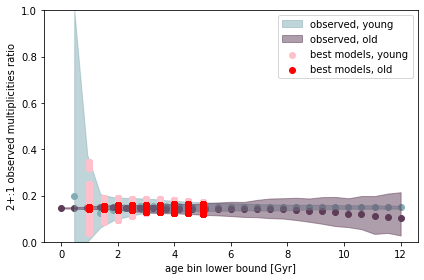

In [322]:
plt.scatter(np.linspace(0,12,bins), np.median(np.array(young_ratios_all), axis=0), c='#83adb5')
plt.scatter(np.linspace(0,12,bins), np.median(np.array(old_ratios_all), axis=0), c='#5e3c58')

young_fill = plt.fill_between(np.linspace(0,12,bins), np.percentile(young_ratios_all, 0.3, axis=0),
                 np.percentile(young_ratios_all, 99.7, axis=0), alpha=0.5, color='#83adb5', label='observed, young')
old_fill = plt.fill_between(np.linspace(0,12,bins), np.percentile(old_ratios_all, 0.3, axis=0),
                 np.percentile(old_ratios_all, 99.7, axis=0), alpha=0.5, color='#5e3c58', label='observed, old')

plt.scatter(np.ones(len(keep10))*1., keep10.young10_multiplicity_ratio, color='pink', label='best models, young')
plt.scatter(np.ones(len(keep10))*1., keep10.old10_multiplicity_ratio, color='r', label='best models, old')
plt.scatter(np.ones(len(keep15))*1.5, keep15.young15_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep15))*1.5, keep15.old15_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep20))*2., keep20.young20_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep20))*2., keep20.old20_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep25))*2.5, keep25.young25_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep25))*2.5, keep25.old25_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep30))*3., keep30.young30_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep30))*3., keep30.old30_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep35))*3.5, keep35.young35_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep35))*3.5, keep35.old35_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep40))*4., keep40.young40_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep40))*4., keep40.old40_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep45))*4.5, keep45.young45_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep45))*4.5, keep45.old45_multiplicity_ratio, color='r')
plt.scatter(np.ones(len(keep50))*5., keep50.young50_multiplicity_ratio, color='pink')
plt.scatter(np.ones(len(keep50))*5., keep50.old50_multiplicity_ratio, color='r')

plt.ylim([0, 1])
plt.ylabel('2+:1 observed multiplicities ratio')
plt.xlabel('age bin lower bound [Gyr]')
plt.tight_layout()
plt.legend()
plt.savefig('paper/observed_and_best_model_multi_ratios.pdf', format='pdf')
plt.show()

remaining based on transit multiplicity:  152
remaining after ruling out intact fractions:  35


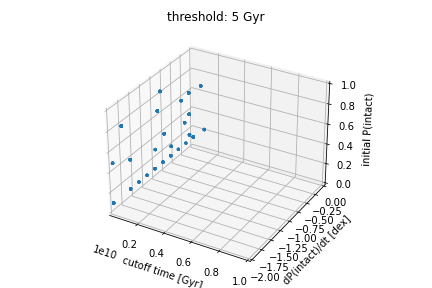

In [301]:
df_keep_multi = df_keep.loc[(df_keep.multi_match_young50 == 1) & (df_keep.multi_match_old50 == 1)]
%matplotlib widget

print("remaining based on transit multiplicity: ", len(df_keep.groupby(['m','b','c'])))
print("remaining after ruling out intact fractions: ", len(df_keep_multi.groupby(['m','b','c'])))
#print("remaining after ruling out intact fractions: ", len(df_keep_multi.groupby(['m','b','c','f'])))
fig = plt.figure()
ax = plt.axes(projection='3d')

im = ax.scatter3D(df_keep_multi.fixed_c, df_keep_multi.m, df_keep_multi.b, s=5)
ax.set_xlabel('cutoff time [Gyr]')
ax.set_ylabel('dP(intact)/dt [dex]')
ax.set_zlabel('initial P(intact)')
ax.set_xlim(1e8, 1e10)
ax.set_ylim(-2, 0)
ax.set_zlim(0, 1)
ax.set_title('threshold: 5 Gyr')
fig.tight_layout()
plt.savefig('paper/best_models_50gyr.pdf', format='pdf')
plt.show()

In [302]:
df_keep_deduped = df_keep.drop_duplicates(subset=['m','b','c'])
df_keep_deduped['model_tuple'] = list(zip(df_keep_deduped.m, df_keep_deduped.b, df_keep_deduped.c))
df_keep_deduped

,filename,m,b,c,f,logL,transit_multiplicity,geom_transit_multiplicity,intact_frac,disrupted_frac,...,multi_match_old30,multi_match_young35,multi_match_old35,multi_match_young40,multi_match_old40,multi_match_young45,multi_match_old45,multi_match_young50,multi_match_old50,model_tuple
366,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.1,1.000000e+08,0.1,-653.540607,"[236.8, 29.0, 9.3, 3.1, 0.8, 0.2]","[2, 31351, 30877, 43, 78, 3374, 3520, 13, 21, ...",0.028797,0.071201,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"(-2.0, 0.1, 100000000.0)"
729,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.2,1.000000e+08,0.1,-570.598219,"[247.4, 39.1, 15.8, 6.7, 1.7000000000000002, 0.1]","[27508, 27769, 7014, 7005, 0.0, 0.0, 0.0]",0.048144,0.051856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(-2.0, 0.2, 100000000.0)"
1840,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.5,1.584893e+08,0.1,-645.753348,"[243.60000000000002, 26.3, 7.9, 4.600000000000...","[1, 31068, 31230, 104, 55, 3379, 3439, 11, 8, 2]",0.028576,0.071423,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,"(-2.0, 0.5, 158489319.2461111)"
2205,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.6,1.584893e+08,0.1,-572.486811,"[245.20000000000002, 42.2, 12.5, 8.1, 1.900000...","[27902, 27598, 6881, 6915, 0.0, 0.0, 0.0]",0.047735,0.052265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(-2.0, 0.6000000000000001, 158489319.2461111)"
3314,/blue/sarahballard/c.lam/sculpting2/simulation...,-2.0,0.9,2.511886e+08,0.1,-635.561174,"[242.70000000000002, 29.700000000000003, 8.200...","[31110, 31256, 3468, 3462, 0.0, 0.0, 0.0]",0.028931,0.071069,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"(-2.0, 0.9, 251188643.1509582)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40802,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,1.584893e+09,0.1,-564.495985,"[251.0, 39.900000000000006, 14.700000000000001...","[27467, 27824, 6983, 7022, 0.0, 0.0, 0.0]",0.048106,0.051894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.2, 1584893192.4611108)"
40835,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,2.511886e+09,0.1,-571.090097,"[245.5, 42.300000000000004, 13.700000000000001...","[27787, 27740, 6740, 7029, 0.0, 0.0, 0.0]",0.047677,0.052323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.2, 2511886431.509582)"
40868,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,3.981072e+09,0.1,-561.719330,"[252.10000000000002, 38.2, 15.9, 5.80000000000...","[27882, 27499, 6992, 6923, 0.0, 0.0, 0.0]",0.047998,0.052002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.2, 3981071705.5349693)"
40901,/blue/sarahballard/c.lam/sculpting2/simulation...,0.0,0.2,6.309573e+09,0.1,-556.415698,"[250.4, 42.300000000000004, 15.8, 6.4, 1.70000...","[28085, 27390, 6950, 6871, 0.0, 0.0, 0.0]",0.047831,0.052169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.2, 6309573444.801943)"


In [303]:
df_keep_deduped_multi

,filename,m,b,c,f,logL,transit_multiplicity,geom_transit_multiplicity,intact_frac,disrupted_frac,...,multi_match_old30,multi_match_young35,multi_match_old35,multi_match_young40,multi_match_old40,multi_match_young45,multi_match_old45,multi_match_young50,multi_match_old50,model_tuple


In [304]:
tuple([-2.0, 0.1, 100000000.0]) in list(df_keep_deduped_multi.model_tuple)

False

In [305]:
df_keep_deduped.model_tuple

366                           (-2.0, 0.1, 100000000.0)
729                           (-2.0, 0.2, 100000000.0)
1840                    (-2.0, 0.5, 158489319.2461111)
2205     (-2.0, 0.6000000000000001, 158489319.2461111)
3314                    (-2.0, 0.9, 251188643.1509582)
                             ...                      
40802                   (0.0, 0.2, 1584893192.4611108)
40835                    (0.0, 0.2, 2511886431.509582)
40868                   (0.0, 0.2, 3981071705.5349693)
40901                    (0.0, 0.2, 6309573444.801943)
40935                        (0.0, 0.2, 10000000000.0)
Name: model_tuple, Length: 152, dtype: object

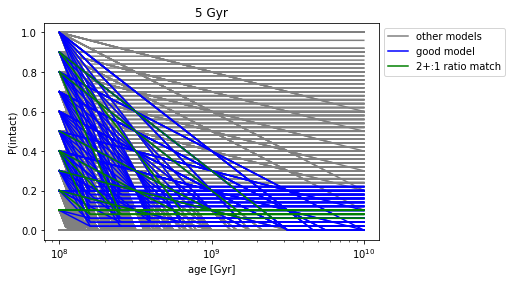

In [314]:
%matplotlib inline
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)

x = np.array(np.linspace(1e8, 1e10, 1000))
df_keep_deduped_multi = df_keep_deduped.loc[(df_keep_deduped.multi_match_young50 == 1) & (df_keep_deduped.multi_match_old50 == 1)]

count1 = 0
count2 = 0
count3 = 0
for m in np.linspace(-2, 0, 11):
    for b in np.linspace(0, 1, 11):
        for c in np.logspace(8, 10, 11):
            before = x[x<=c]
            after = x[x>c]
            y_before = compute_prob(before, m, b, c)
            y_after = np.ones(len(after)) * compute_prob_after_cutoff(after, m, b, c)
            y = np.concatenate((y_before,y_after))
            y[y<0] = 0
            y[y>1] = 1
            #print(tuple([m,b,c]))
            #print(list(df_keep_deduped.model_tuple)[0])
            #adsfdf
            if tuple([m,b,c]) in list(df_keep_deduped_multi.model_tuple):
                if count1 < 1:
                    plt.plot(x, y, color='green',zorder=3, label='2+:1 ratio match')
                else:
                    plt.plot(x, y, color='green',zorder=3)
                count1 += 1

            elif tuple([m,b,c]) in list(df_keep_deduped.model_tuple):
                #count2 = 0
                if count2 < 1:
                    plt.plot(x, y, color='blue',zorder=2, label='good model')
                else:
                     plt.plot(x, y, color='blue',zorder=2)
                count2 += 1
            else:
                #count3 = 0
                if count3 < 1:
                    plt.plot(x, y, color='gray',zorder=1, label='other models')
                else:
                    plt.plot(x, y, color='gray',zorder=1)
                count3 += 1

plt.ylabel('P(intact)')
plt.xlabel('age [Gyr]')
plt.xscale('log')
plt.title('5 Gyr')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('paper/models_good_50gyr.pdf', format='pdf')
plt.show()

In [130]:
def compute_prob(x, m, b, c):
    return b + m*(np.log10(x)-8)

def compute_prob_after_cutoff(x, m, b, c):
    return b + m*(np.log10(c)-8)

def compute_prob_vectorized(df, m, b, cutoff): # adapted from Ballard et al in prep, log version
    # calculate probability of intact vs disrupted

    # if/elif/elif/etc in vectorized form
    """
    df['prob_intact'] = np.where(
        df['iso_age']*1e9 <= 1e8, b, np.where(
            df['iso_age']*1e9 > 1e8, b+m*(np.log10(df['iso_age'])-8), np.where(
                df['iso_age']*1e9 > cutoff, b+m*(np.log10(cutoff)-8))))
    """

    try:
        df['prob_intact'] = np.where(
                ((df['iso_age']*1e9 > 1e8) & (df['iso_age']*1e9 <= cutoff)), b+m*(np.log10(df['iso_age']*1e9)-8), np.where(
                    df['iso_age']*1e9 > cutoff, b+m*(np.log10(cutoff)-8), b))
    except: # for asteroseismic ages
        df['prob_intact'] = np.where(
                ((df['Age']*1e9 > 1e8) & (df['Age']*1e9 <= cutoff)), b+m*(np.log10(df['Age']*1e9)-8), np.where(
                    df['Age']*1e9 > cutoff, b+m*(np.log10(cutoff)-8), b))

    # handle impossible probabilities
    df['prob_intact'] = np.where(
        df['prob_intact']<0, 0, np.where(
            df['prob_intact']>1, 1, df['prob_intact']))
            
    return df
    
%matplotlib inline
x = np.linspace(1e8, 1e10, 1000)

df_keep_deduped = df_keep.drop_duplicates(subset=['m','b','c'])
for i in df_keep_deduped:
    print(i)
    asdfd

filename


NameError: name 'asdfd' is not defined